### 1. 로드 데이터 

In [2]:
import tensorflow as tf
fashion_mnist  = tf.keras.datasets.fashion_mnist   
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


### 2. 로드 데이터 확인
 -  28*28 픽셀을 가진 0~ 9까지의 숫자 이미지와 레이블로 구성 
 - 10000개의 실험용 세트와 60000개의 훈련용 학습 데이터로 리턴  

In [3]:
x_test.shape  ,x_train.shape
x_test.shape  ,x_train.shape

((10000, 28, 28), (60000, 28, 28))

### 3. 이미지는 픽셀값 조정 0~ 255 ->  0~1까지로  조정  

In [4]:
x_test ,x_train = x_test/ 255.0 ,  x_train / 255.0
#학습시키기 전에 원핫 인코딩을 레이블을 한건지,        loss에서 할 건지, Sparse Categorical Crossentopy

In [5]:
x_train.shape

(60000, 28, 28)

### 4. 모델 생성
 - 1단계  :    784 -> 1000  -> 10 
 - 2단계  :  784 =  28* 28 
 - 3단계  : 정답은  0~ 9  타켓  10개다  
 - 4단계  :  총 3개의 레이어를 통해서 결과가 출력 된다.  
 - 5단계  : 784를 배열로  ->   1000  (784*1000)  relu  ->  1000*10  softmax로 하자. 

In [10]:
# 모형 ( 단순모형, 복잡한 함수형 모형 ) 여깄는건 단순모형

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten, BatchNormalization, Activation

model = Sequential() #단순 모형 만들기
# 5*5 크기의 필터를 32장 사용하겠다. 즉, 25픽셀 정사각형을 사용하겠다.
# input_shape = (28,28,1) 마지막 1 흑백, 3은 컬러
# 필터의 크기? 홀수 필터, 128* 128 > (7,7)로

model.add(Conv2D(32, kernel_size = 3, padding = 'same', input_shape = (28, 28, 1))) #데이터 인풋
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'same'))




model.add(Conv2D(64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'same'))




model.add(Conv2D(128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Flatten()) # 1차원 변환!!
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))# 0~9까지니까 10개는 있어야 표현이 됨

model.compile(optimizer='adam', # 옵티마이저 : Adam
              loss = 'sparse_categorical_crossentropy', # 손실 함수 : categorical_crossentropy
              metrics = ['accuracy']) # 모니터링 할 평가지표 : 

In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 28, 28, 32)       

### 5. Fit

In [13]:
import time
start_time  = time.time()
hist = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 100, 
                    validation_data = (x_test, y_test), verbose=1)
print(f'fit_time :{time.time() - start_time}')

Epoch 1/30
600/600 [==============================] - 128s 213ms/step - loss: 0.1442 - accuracy: 0.9467 - val_loss: 0.2413 - val_accuracy: 0.9144
Epoch 2/30
600/600 [==============================] - 130s 217ms/step - loss: 0.1164 - accuracy: 0.9567 - val_loss: 0.2649 - val_accuracy: 0.9085
Epoch 3/30
600/600 [==============================] - 135s 225ms/step - loss: 0.0957 - accuracy: 0.9640 - val_loss: 0.2416 - val_accuracy: 0.9207
Epoch 4/30
600/600 [==============================] - 104s 173ms/step - loss: 0.0787 - accuracy: 0.9703 - val_loss: 0.2362 - val_accuracy: 0.9291
Epoch 5/30
600/600 [==============================] - 125s 209ms/step - loss: 0.0648 - accuracy: 0.9762 - val_loss: 0.2653 - val_accuracy: 0.9231
Epoch 6/30
600/600 [==============================] - 131s 219ms/step - loss: 0.0526 - accuracy: 0.9812 - val_loss: 0.3004 - val_accuracy: 0.9203
Epoch 7/30
600/600 [==============================] - 136s 227ms/step - loss: 0.0459 - accuracy: 0.9834 - val_loss: 0.3171 -

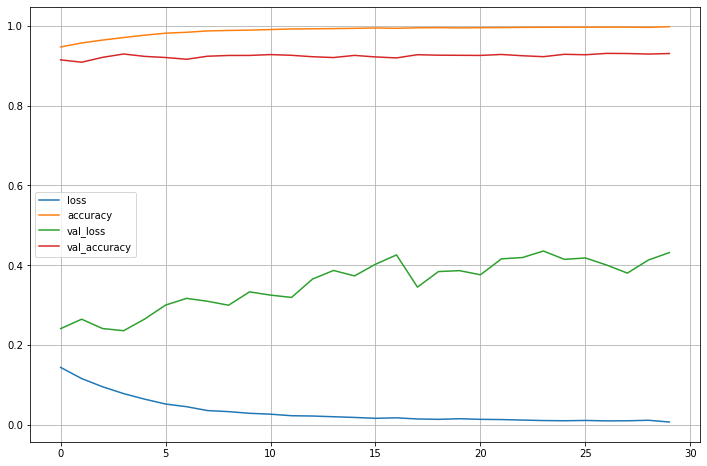

In [14]:
###6. ACC와 Loss그리기  -> loss 확인, 과적합 확인 
import matplotlib.pyplot as plt

plot_target = ['loss', 'accuracy','val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

### 6.score 확인하기 
 

In [15]:
score  = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.4319 - accuracy: 0.9303


7. 예측 


In [23]:
import numpy as np
predicted_res  = model.predict(x_test)
predicted_labels = np.argmax ( predicted_res,  axis =1)  
predicted_labels[:10] # 예측한 데이터 
y_test[:10]   # y_test -> 실제 데이터  

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

### 8. 잘못된 데이터를 찾아보자. 


In [24]:
# 개수로 확인
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

85

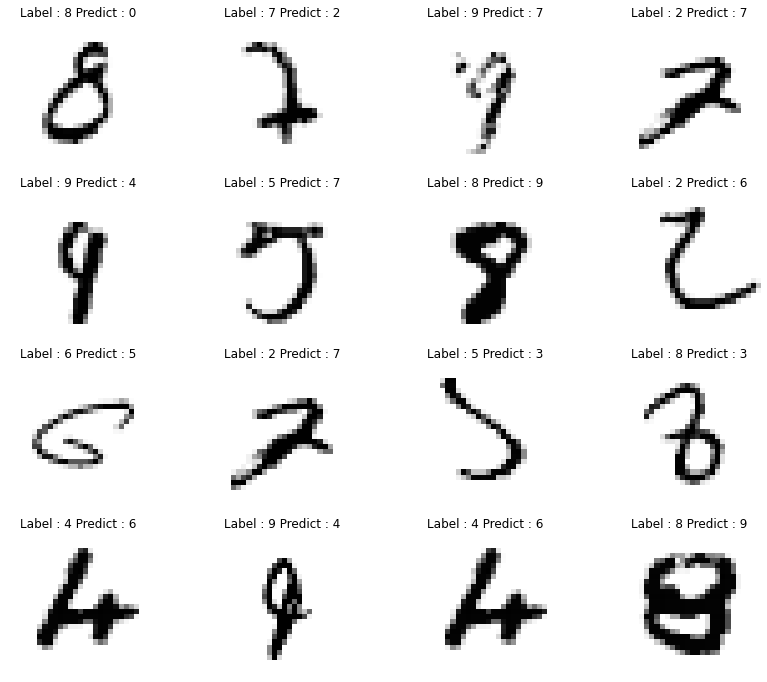

In [25]:
#그래프로 확인  
import random

samples = random.choices(population= wrong_result, k = 16)
samples

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(x_test[n].reshape(28, 28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()